# Practical: MLPs
In this guide, you'll explore how to train and evaluate a MACE model—an MLIP celebrated for its accuracy and performance. Although we focus on MACE, the techniques discussed here can be applied to various machine learning interatomic potentials. For a comprehensive understanding of MACE, consider reading the [primary methodology paper](https://proceedings.neurips.cc/paper_files/paper/2022/file/4a36c3c51af11ed9f34615b81edb5bbc-Paper-Conference.pdf). The MACE framework emerges from merging the principles of Atomic Cluster Expansion (ACE) with those of Neural Equivariant Interatomic Potentials (NequIP), a union further elaborated in the [corresponding publication](https://doi.org/10.48550/arXiv.2205.06643). You can also refer to [this study](https://doi.org/10.48550/arXiv.2305.14247) for insights into its benchmark performance. The complete [codebase](https://github.com/ACEsuit/mace) is available publicly, and you can find the detailed documentation [here](https://mace-docs.readthedocs.io/en/latest/). This notebook was prepared by Ioan Magdău, Ilyes Batatia, and Will Baldwin.


In [ ]:
!git clone https://github.com/imagdau/Tutorials.git
!pip 
%cd Tutorials


fatal: destination path 'Tutorials' already exists and is not an empty directory.
/Users/zeyudeng/Desktop/workspace/teaching/MLE4217_5219_book/machine_learning_potentials/Tutorials


In [3]:
from ase.io import read, write
import numpy as np

db = read('data/solvent_configs.xyz', ':') #read in list of configs

print("Number of configs in database: ", len(db))
print("Number of atoms in each config: ", np.array([len(at) for at in db]))
print("Number of atoms in the smallest config: ", np.min([len(at) for at in db])) #test if database contains isolated atoms
print("Information stored in config.info: \n", db[10].info) #check info
print("Information stored in config.arrays: \n", db[10].arrays)

Number of configs in database:  5000
Number of atoms in each config:  [24 22 25 ... 25 32 40]
Number of atoms in the smallest config:  8
Information stored in config.info: 
 {}
Information stored in config.arrays: 
 {'numbers': array([6, 8, 6, 8, 6, 1, 1, 8, 1, 1, 6, 8, 8, 8, 6, 6, 6, 1, 1, 6, 1, 1,
       1, 1, 1, 1, 1, 1]), 'positions': array([[ 2.42930269,  5.21925545, -2.44555688],
       [ 1.36888075,  4.36736107, -3.07848001],
       [ 1.0430907 ,  3.33270121, -2.205446  ],
       [ 1.83499873,  3.2705152 , -1.20140588],
       [ 2.83662271,  4.2916441 , -1.29654086],
       [ 3.20092463,  5.52685308, -3.12019396],
       [ 1.98896468,  6.07220507, -2.07261896],
       [ 0.15712669,  2.55914021, -2.58440089],
       [ 3.80655074,  3.73805737, -1.62337792],
       [ 3.03487277,  4.82053137, -0.40139091],
       [-1.35643137, -2.96665978,  1.35700715],
       [-1.21188033, -2.7462728 ,  0.1501831 ],
       [-0.54117233, -3.68505168,  2.08627701],
       [-2.42475724, -2.65949082,  

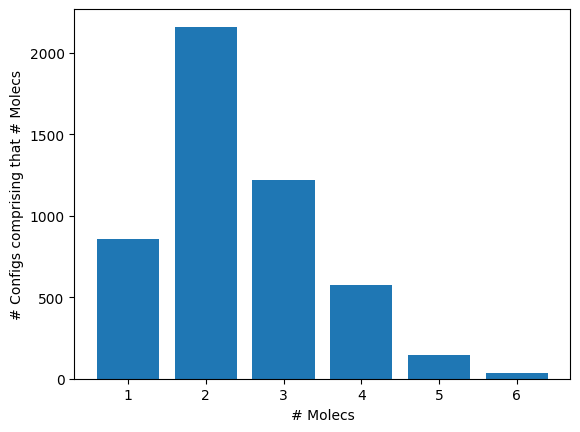

In [4]:
from matplotlib import pyplot as plt

db = read('data/solvent_molecs.xyz', ':')
Nmols = np.array([at.info['Nmols'] for at in db]) #collect Nmols information across all data
plt.hist(Nmols, align='left', bins=[1,2,3,4,5,6,7], rwidth=0.8);
plt.xlabel('# Molecs');
plt.ylabel('# Configs comprising that # Molecs');

In [5]:
from ase import Atoms

db = read('data/solvent_molecs.xyz', ':')
db = [Atoms('H'), Atoms('C'), Atoms('O')]+db #add isolated atoms to the database

for at in db[:3]:
    at.info['config_type'] = 'IsolatedAtom'

print("Number of configs in database: ", len(db))

Number of configs in database:  5003


In [6]:
from tqdm import tqdm
from xtb.ase.calculator import XTB
xtb_calc = XTB(method="GFN2-xTB")

for at in tqdm(db[:15]): #showcase: first 15 frames
    at.calc = xtb_calc
    at.info['energy_xtb'] = at.get_potential_energy()
    at.arrays['forces_xtb'] = at.get_forces()
# write('data/solvent_xtb.xyz', db) #save full result

print("Information stored in config.info: \n", db[13].info) #check info
print("Information stored in config.arrays: \n", db[13].arrays)

ModuleNotFoundError: No module named 'xtb'